<a href="https://colab.research.google.com/github/Naomiweinberger/Hate-Speech/blob/main/EDAipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries** 

In [ ]:
!pip install tweet-preprocessor 
!pip install tweet-preprocessor 

In [ ]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stopword=set(stopwords.words('english'))
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, FreqDist
stemmer = nltk.SnowballStemmer("english")
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk import ngrams, FreqDist
nltk.download('punkt')
import string
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from xgboost import XGBClassifier as xbg 
from imblearn.pipeline import Pipeline as IMBPipeline
from imblearn.over_sampling import SMOTE


import preprocessor as p
from collections import Counter


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


EDA Data

In [ ]:
hatespeech_df = pd.read_csv("/content/labeled_data.csv")
hatespeech_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
hatespeech_df2=pd.read_csv("/content/train_E6oV3lV.csv")
hatespeech_df2.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
hatespeech_df_1=hatespeech_df[['class','tweet']]

In [ ]:
hatespeech_df2['class']=hatespeech_df2['label']

In [ ]:
hatespeech_df2['class'] = hatespeech_df2['class'].replace(['0'],'2')

In [ ]:
df_2 = pd.DataFrame(hatespeech_df2, columns= ['class','tweet'])
df_2['class'] = df_2['class'].replace([1,0],[0,2])

In [ ]:
hatespeech=pd.concat([hatespeech_df_1, df_2])
hatespeech.shape

(56745, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


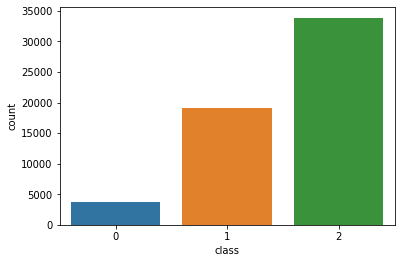

In [ ]:
sns.countplot('class',data=hatespeech)

**Data**

**Clean Text/Tokenike Test**

In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub("@[A-Za-z0-9_]+", " ", text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\w\s]', '', (text))
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = TweetTokenizer()
def lemmatize_text(text):
 return [(lemmatizer.lemmatize(w)) for w in \
                                     w_tokenizer.tokenize((text))]

**HATE**

In [ ]:
Hate = hatespeech.loc[lambda x: x['class'] == 0]
Hate_tweets=Hate['tweet'].apply(clean_text)

In [ ]:
stopwords = set(STOPWORDS)
hatetext = " ".join(hatetext for hatetext in Hate.tweet)
wordcloud = WordCloud(stopwords=stopwords).generate(hatetext)

In [ ]:
stop_words=set(stopwords)
new_stopwords=['b','dtype','a','i',',@white_thunduh','@WhaleLookyHere','@VigxRArts','@NoChillPaz','@MarkRoundtreeJr','@HowdyDowdy1','@DevilGrimz','@CB_Baby24','@CB_Baby24',':','name','youu',"you's",'tweet','tellin','really','Length','@viva_based','@mleew17','@UrKindOfBrand','@T_Madison_x',
              '@ShenikaRoberts', '@LifeAsKing','@C_G_Anderson','!','20',',','.','..','...','...\n...','0sbaby','1','19190','2','24774','24775','24778','24780','24781','3','4','5',':','?','@2','@8','@C_G_Anderson', 
              '@LifeAsKing','@ShenikaRoberts','@T_Madison_x','@UrKindOfBrand','@mleew17','@viva_based','110','202','type','dia','Name','1430', 'object','24777','@Blackman38Tide','@white_thunduh','I','hope','24776','24751','184','PEOPL','At','biggest','know',"I'm",'"','...\n   ...','24685','24576',
               '*', 'Dawg', 'RT', '“','need', 'lo', 'The', 'ain', 'young', 'bout', 'dwn', "'",'-','/','0','24736', '24737','24767','24779','24782','40','4163', '63', '66', '67',':/','@Addicted2Guys','@AllAboutManFeet','@Allyhaaaaa', '@N_tel','@ViVaLa_Ari','@mayasolovely', 'http://t.co/3gzUpfuMev', 's', 'th', 'tho', '~', '|',
               '&', 'As', 'Eileen', 'Dahlia', 'SimplyAddictedToGuys','yaya','avi','User','co']
new_stopwords_list = stop_words.union(new_stopwords)

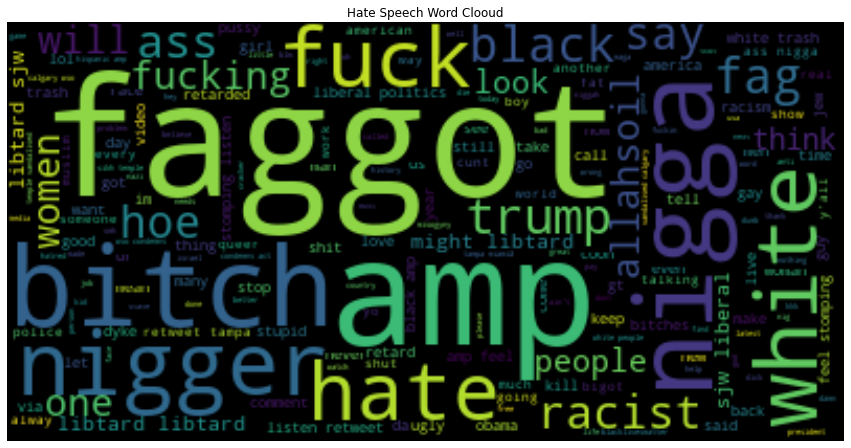

In [ ]:
# visualize the image
wordcloud_h = WordCloud(stopwords=new_stopwords_list).generate(hatetext)
 # visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud_h, interpolation='bilinear')
plt.axis("off")
plt.title('Hate Speech Word Clooud')
plt.show()

In [ ]:
lt_hate=lemmatize_text(str(Hate['tweet']))

In [ ]:
fdist_hate = FreqDist(lt_hate)

In [ ]:
hate_2=[]
for word in lt_hate: 
    if word not in new_stopwords_list:
        hate_2.append(word)

In [ ]:
freq_hate=FreqDist(hate_2)
freq_hate

FreqDist({'#calgary': 1,
          '#jcpenn': 1,
          '#sikh': 1,
          '#temple': 1,
          '31934': 1,
          '31946': 1,
          '31947': 1,
          '31948': 1,
          '31960': 1,
          '3672': 1,
          '85': 1,
          '89': 1,
          '@user': 5,
          'BLACK': 1,
          'HATE': 1,
          'LMFAOOOO': 1,
          'alsarabsss': 1,
          'ask': 1,
          'ball': 1,
          'banned': 1,
          'fucking': 1,
          'gay': 1,
          'hashta': 1,
          'kentucky': 1,
          'lady': 1,
          'least': 1,
          'mailbox': 1,
          'make': 1,
          'mall': 1,
          'nigger': 1,
          'offended': 1,
          'omfg': 1,
          'vandalised': 1})

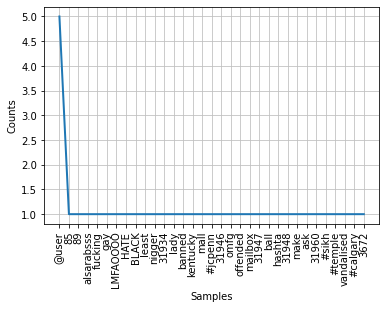

In [ ]:
freq_hate.plot(50)

In [ ]:
word_count_hate=Counter(hate_2)
print(word_count_hate.most_common(500))

[('@user', 5), ('85', 1), ('89', 1), ('alsarabsss', 1), ('fucking', 1), ('gay', 1), ('LMFAOOOO', 1), ('HATE', 1), ('BLACK', 1), ('least', 1), ('nigger', 1), ('31934', 1), ('lady', 1), ('banned', 1), ('kentucky', 1), ('mall', 1), ('#jcpenn', 1), ('31946', 1), ('omfg', 1), ('offended', 1), ('mailbox', 1), ('31947', 1), ('ball', 1), ('hashta', 1), ('31948', 1), ('make', 1), ('ask', 1), ('31960', 1), ('#sikh', 1), ('#temple', 1), ('vandalised', 1), ('#calgary', 1), ('3672', 1)]


**OFFENSIVE**

In [ ]:
Offensive= hatespeech.loc[lambda x: x['class'] == 1]
Offensive_tweets=Offensive['tweet'].apply(clean_text)


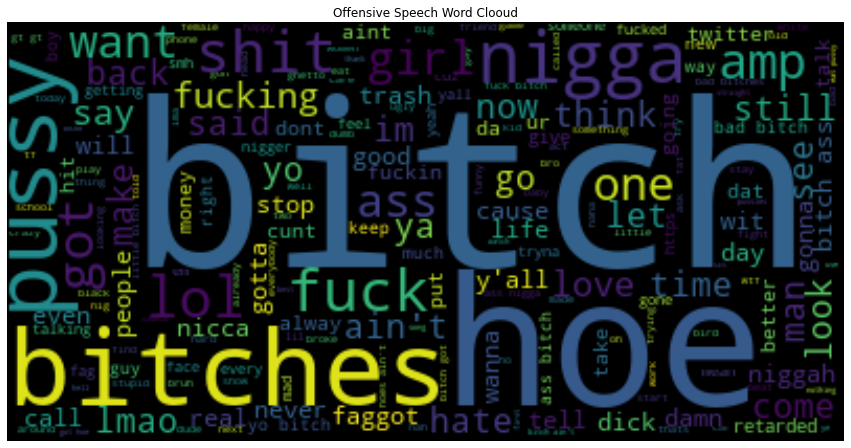

In [ ]:
offensivetext = " ".join(offensivetext for offensivetext in Offensive.tweet)

 
# visualize the image
wordcloud_o = WordCloud(stopwords=new_stopwords_list).generate(offensivetext)
 
# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud_o, interpolation='bilinear')
plt.axis("off")
plt.title('Offensive Speech Word Clooud')
plt.show()

In [ ]:
lt_offensive=lemmatize_text(str(Offensive['tweet']))

In [ ]:
fdist_offensive = FreqDist(lt_offensive)


In [ ]:
offensive_2=[]
for word in lt_offensive: 
    if word not in new_stopwords_list:
        offensive_2.append(word)

In [ ]:
freq_offensive=FreqDist(offensive_2)


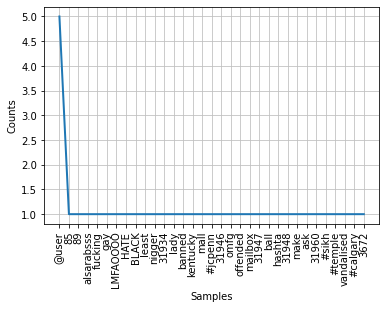

In [ ]:
freq_hate.plot(250)

**NORMAL**

In [ ]:
Normal=hatespeech.loc[lambda x: x['class'] == 2]


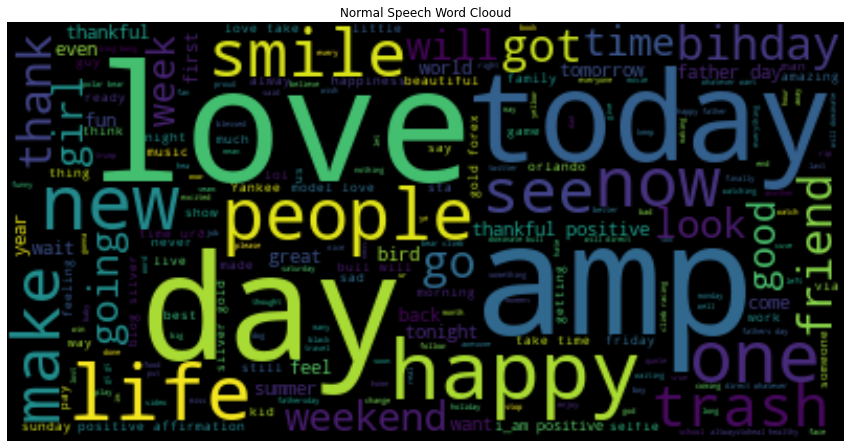

In [ ]:
normaltext = " ".join(normaltext for normaltext in Normal.tweet)
wordcloud_o = WordCloud(stopwords=new_stopwords_list).generate(normaltext)
 

# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud_o, interpolation='bilinear')
plt.axis("off")
plt.title('Normal Speech Word Clooud')
plt.show()

In [ ]:
lt_Normal=lemmatize_text(str(Normal['tweet']))

In [ ]:
FreqDist(lt_Normal)

FreqDist({'!': 3,
          '"': 6,
          '&': 1,
          ',': 2,
          '-': 1,
          '...': 7,
          '...\n   ...': 1,
          '/': 1,
          '0': 1,
          '31956': 1,
          '31957': 1,
          '31958': 1,
          '31959': 1,
          '31961': 1,
          '33883': 1,
          '40': 1,
          '63': 1,
          '66': 1,
          '67': 1,
          ':': 7,
          ':/': 1,
          '?': 1,
          '@Addicted2Guys': 1,
          '@AllAboutManFeet': 1,
          '@Allyhaaaaa': 1,
          '@mayasolovely': 1,
          '@user': 3,
          'As': 1,
          'Lemmie': 1,
          'Length': 1,
          'Name': 1,
          'Oreo': 1,
          'RT': 1,
          'SimplyAddictedToGuys': 1,
          'a': 3,
          'airwave': 1,
          'ate': 1,
          'carnt': 1,
          'cat': 1,
          'do': 1,
          'doghouse': 1,
          'dtype': 1,
          'eat': 1,
          'first': 1,
          'fishing': 1,
          'follow': 

In [ ]:
Normal_2=[]
for word in lt_Normal: 
    if word not in new_stopwords_list:
        Normal_2.append(word)

In [ ]:
freq_normal=FreqDist(Normal_2)
freq_normal

FreqDist({'31956': 1,
          '31957': 1,
          '31958': 1,
          '31959': 1,
          '31961': 1,
          '33883': 1,
          '@user': 3,
          'Lemmie': 1,
          'Oreo': 1,
          'airwave': 1,
          'ate': 1,
          'carnt': 1,
          'cat': 1,
          'doghouse': 1,
          'eat': 1,
          'first': 1,
          'fishing': 1,
          'follow': 1,
          'inside': 1,
          'isz': 1,
          'listening': 1,
          'momma': 1,
          'monday': 1,
          'morning': 1,
          'nina': 1,
          'otw': 1,
          'pussy': 1,
          'sad': 1,
          'said': 1,
          'see': 1,
          'song': 1,
          'thank': 1,
          'ti': 1,
          'tomorrow': 1,
          'trying': 1,
          'turner': 1,
          'wait': 1,
          'woman': 1,
          'woo': 1,
          'youuu': 1,
          '\x8d': 5,
          '\x98': 5,
          '\x9f': 5,
          'ð': 6})

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 152 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0, flags

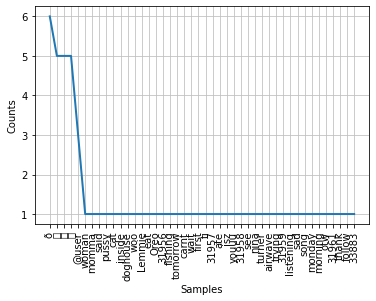

In [ ]:
freq_normal.plot(50)